In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [374]:
df=pd.read_csv("seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,01/01/2012,0.0,12.8,5.0,4.7,drizzle
1,01/02/2012,10.9,10.6,2.8,4.5,rain
2,01/03/2012,0.8,11.7,7.2,2.3,rain
3,01/04/2012,20.3,12.2,5.6,4.7,rain
4,01/05/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,rain
1457,12/28/2015,1.5,5.0,1.7,1.3,rain
1458,12/29/2015,0.0,7.2,0.6,2.6,fog
1459,12/30/2015,0.0,5.6,-1.0,3.4,sun


In [375]:
df.shape

(1461, 6)

In [376]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [377]:
df["weather"].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [378]:
x=df.iloc[:,:-1]
x

,date,precipitation,temp_max,temp_min,wind
0,01/01/2012,0.0,12.8,5.0,4.7
1,01/02/2012,10.9,10.6,2.8,4.5
2,01/03/2012,0.8,11.7,7.2,2.3
3,01/04/2012,20.3,12.2,5.6,4.7
4,01/05/2012,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9
1457,12/28/2015,1.5,5.0,1.7,1.3
1458,12/29/2015,0.0,7.2,0.6,2.6
1459,12/30/2015,0.0,5.6,-1.0,3.4


In [379]:
x['date'] = pd.to_datetime(x['date'])
x['year'] = x['date'].dt.year
x['month'] = x['date'].dt.month
x['day'] = x['date'].dt.day
x.drop('date', axis=1, inplace=True)
x

,precipitation,temp_max,temp_min,wind,year,month,day
0,0.0,12.8,5.0,4.7,2012,1,1
1,10.9,10.6,2.8,4.5,2012,1,2
2,0.8,11.7,7.2,2.3,2012,1,3
3,20.3,12.2,5.6,4.7,2012,1,4
4,1.3,8.9,2.8,6.1,2012,1,5
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27
1457,1.5,5.0,1.7,1.3,2015,12,28
1458,0.0,7.2,0.6,2.6,2015,12,29
1459,0.0,5.6,-1.0,3.4,2015,12,30


In [380]:
y=df.iloc[:,-1]
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [381]:
# from sklearn.preprocessing import LabelEncoder

In [382]:
# l=LabelEncoder()
# y=l.fit_transform(y)
# y

In [383]:
replacement_dict = {
    'rain': 1,
    'sun': 2,
    'fog': 3,
    'drizzle': 4,
    'snow': 5
}

# Replace values in the Series using the dictionary
y = y.replace(replacement_dict)
y

0       4
1       1
2       1
3       1
4       1
       ..
1456    1
1457    1
1458    3
1459    2
1460    2
Name: weather, Length: 1461, dtype: int64

<AxesSubplot: xlabel='weather', ylabel='count'>

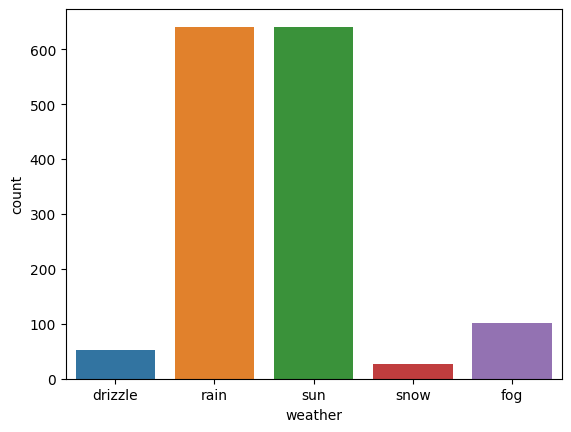

In [384]:
sea.countplot(x='weather',data=df)

In [385]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=111)

In [386]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)

In [387]:
dt_result=dt_model.predict(x_test)
dt_result

array([2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 1, 2, 2, 2, 1, 1, 4, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 4, 4, 3, 2, 1, 1,
       2, 2, 2, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 3, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 3, 2, 2, 3, 2, 2, 5, 3, 2, 2, 2, 1, 3, 2, 2, 1,
       3, 1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 5, 2, 3, 1, 2, 1, 4, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 3, 2, 2, 1, 2, 4, 1, 1, 2, 2, 4, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 3, 2, 1,
       2, 2, 1, 2, 1, 1, 1], dtype=int64)

In [388]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,dt_result)
cm

array([[122,   5,   1,   1,   2],
       [  7, 101,  17,   3,   0],
       [  1,  16,   6,   0,   0],
       [  0,   4,   0,   4,   0],
       [  3,   0,   0,   0,   0]], dtype=int64)

<AxesSubplot: >

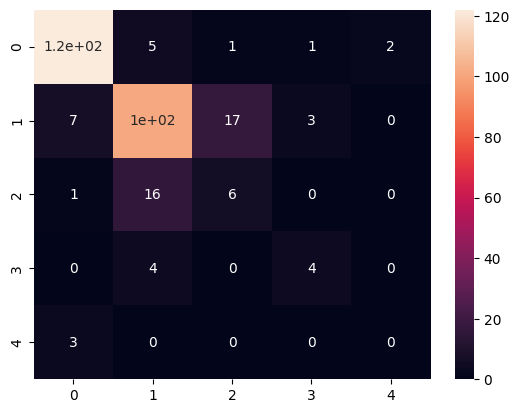

In [389]:
sea.heatmap(cm, annot=True)

In [390]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, dt_result)
report

'              precision    recall  f1-score   support\n\n           1       0.92      0.93      0.92       131\n           2       0.80      0.79      0.80       128\n           3       0.25      0.26      0.26        23\n           4       0.50      0.50      0.50         8\n           5       0.00      0.00      0.00         3\n\n    accuracy                           0.80       293\n   macro avg       0.49      0.50      0.49       293\nweighted avg       0.79      0.80      0.79       293\n'

In [391]:
# result=dt_model.predict([[0.0,12.8,5.0,4.7,2012,1,1]])
# result
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
log_model=logistic.fit(x_train,y_train)

C:\Users\SANJIDA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [392]:
lr_result=log_model.predict(x_test)

In [393]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,lr_result)
cm

array([[113,  18,   0,   0,   0],
       [ 15, 109,   0,   0,   4],
       [  3,  20,   0,   0,   0],
       [  1,   7,   0,   0,   0],
       [  3,   0,   0,   0,   0]], dtype=int64)

<AxesSubplot: >

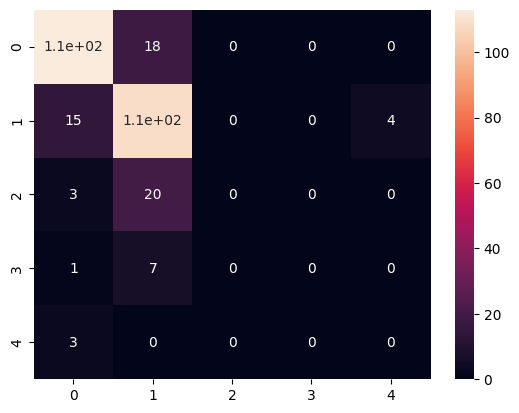

In [394]:
sea.heatmap(cm, annot=True)

In [395]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, lr_result)

C:\Users\SANJIDA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANJIDA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANJIDA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [396]:
print(report)

              precision    recall  f1-score   support

           1       0.84      0.86      0.85       131
           2       0.71      0.85      0.77       128
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         3

    accuracy                           0.76       293
   macro avg       0.31      0.34      0.32       293
weighted avg       0.68      0.76      0.72       293



In [397]:
acc = accuracy_score(y_test, lr_result)
acc

0.757679180887372

In [398]:
# result=dt_model.predict([[0.0,12.8,5.0,4.7,2012,1,1]])
# result
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)

In [399]:
rf_result=rf.predict(x_test)

In [400]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,rf_result)
cm

array([[123,   7,   0,   0,   1],
       [  5, 120,   1,   2,   0],
       [  0,  18,   5,   0,   0],
       [  0,   5,   0,   3,   0],
       [  3,   0,   0,   0,   0]], dtype=int64)

<AxesSubplot: >

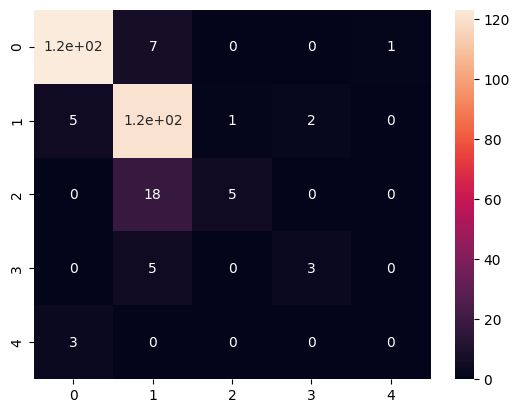

In [401]:
sea.heatmap(cm, annot=True)

In [402]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, rf_result)

In [403]:
print(report)

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       131
           2       0.80      0.94      0.86       128
           3       0.83      0.22      0.34        23
           4       0.60      0.38      0.46         8
           5       0.00      0.00      0.00         3

    accuracy                           0.86       293
   macro avg       0.63      0.49      0.52       293
weighted avg       0.85      0.86      0.84       293



In [404]:
acc = accuracy_score(y_test, rf_result)
acc

0.856655290102389

In [405]:
## SMOTE (Ovesampling)

from imblearn.over_sampling import SMOTE
from collections import Counter


In [406]:
y_train.value_counts()

2    512
1    510
3     78
4     45
5     23
Name: weather, dtype: int64

## Imbalance Handling (Oversampling)

In [407]:
# Apply SMOTE
sampling_strategy = {3: 500, 4: 500, 5: 500} 

oversampler = SMOTE(sampling_strategy=sampling_strategy)
X_resampled, y_resampled = oversampler.fit_resample(x_train, y_train)

print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({2: 512, 1: 510, 3: 500, 5: 500, 4: 500})


In [408]:
y_resampled.value_counts()

2    512
1    510
3    500
5    500
4    500
Name: weather, dtype: int64

<AxesSubplot: xlabel='weather', ylabel='count'>

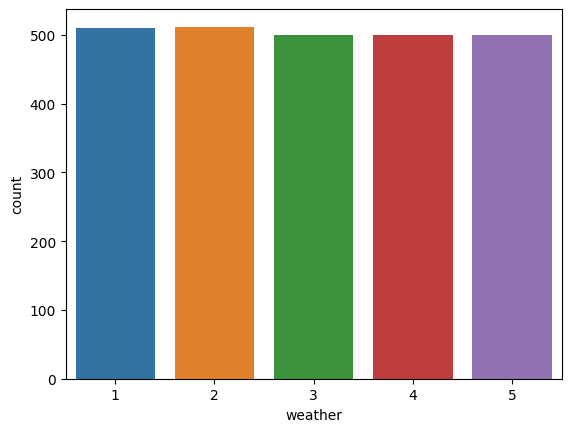

In [409]:
sea.countplot(x=y_resampled)

In [410]:
# decision tree imbalance handling 
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier(random_state = 42) 
dt_model=dt.fit(X_resampled,y_resampled) 

In [411]:
y_pred = dt_model.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[119,   5,   0,   2,   5],
       [  3,  86,  25,  14,   0],
       [  0,  13,   9,   1,   0],
       [  1,   3,   1,   3,   0],
       [  2,   0,   0,   0,   1]], dtype=int64)

<AxesSubplot: >

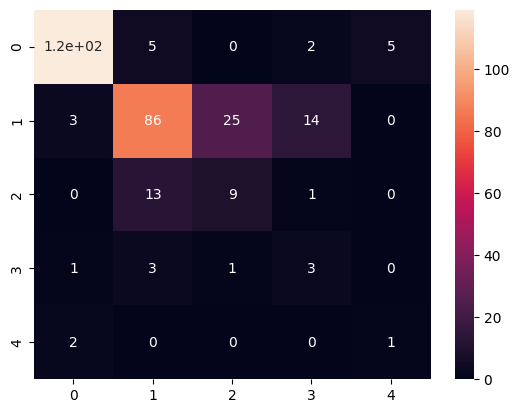

In [412]:
sea.heatmap(cm, annot=True)

In [413]:
# Performance Metrics 

from sklearn.metrics import classification_report, accuracy_score

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.95      0.91      0.93       131
           2       0.80      0.67      0.73       128
           3       0.26      0.39      0.31        23
           4       0.15      0.38      0.21         8
           5       0.17      0.33      0.22         3

    accuracy                           0.74       293
   macro avg       0.47      0.54      0.48       293
weighted avg       0.80      0.74      0.77       293



In [414]:
acc = accuracy_score(y_test, y_pred)
acc

0.7440273037542662

In [415]:
### Random Forest 

In [416]:
# With imbalance handling 
rf=RandomForestClassifier()
rf_model=rf.fit(X_resampled,y_resampled)

# Performance Metrics 

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

y_pred = rf_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
acc

              precision    recall  f1-score   support

           1       0.96      0.92      0.94       131
           2       0.82      0.82      0.82       128
           3       0.53      0.43      0.48        23
           4       0.24      0.50      0.32         8
           5       0.25      0.33      0.29         3

    accuracy                           0.82       293
   macro avg       0.56      0.60      0.57       293
weighted avg       0.84      0.82      0.83       293



0.8191126279863481

<AxesSubplot: >

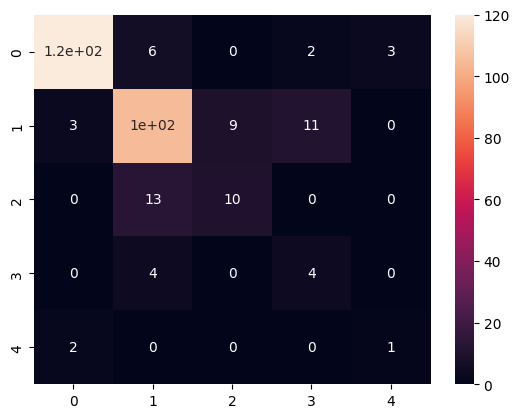

In [417]:
sea.heatmap(cm, annot=True)

In [418]:
# Without imbalance handling 

from sklearn.neighbors import KNeighborsClassifier  
kn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
kn_model=rf.fit(x_train, y_train)

# Performance Metrics 

from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
acc

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       131
           2       0.80      0.95      0.87       128
           3       1.00      0.22      0.36        23
           4       0.67      0.25      0.36         8
           5       0.00      0.00      0.00         3

    accuracy                           0.86       293
   macro avg       0.68      0.47      0.51       293
weighted avg       0.86      0.86      0.84       293



0.8600682593856656

In [419]:
# With imbalance handling 
kn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
kn_model=rf.fit(X_resampled,y_resampled)

# Performance Metrics 

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

y_pred = rf_model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print(f"accuracy: {acc}, Precision: {prec}, recall: {recall}")

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       131
           2       0.82      0.84      0.83       128
           3       0.50      0.39      0.44        23
           4       0.24      0.50      0.32         8
           5       0.20      0.33      0.25         3

    accuracy                           0.82       293
   macro avg       0.55      0.59      0.56       293
weighted avg       0.84      0.82      0.83       293

accuracy: 0.8191126279863481, Precision: 0.8398499539023775, recall: 0.8191126279863481


In [420]:
### XGBoost

In [421]:
# With imbalance handling 
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb_model=rf.fit(x_train,y_train)

# Performance Metrics 

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

y_pred = xgb_model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print(f"accuracy: {acc}, Precision: {prec}, recall: {recall}")

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       131
           2       0.80      0.96      0.87       128
           3       1.00      0.22      0.36        23
           4       1.00      0.25      0.40         8
           5       0.00      0.00      0.00         3

    accuracy                           0.86       293
   macro avg       0.75      0.47      0.51       293
weighted avg       0.87      0.86      0.84       293

accuracy: 0.863481228668942, Precision: 0.8745179734940827, recall: 0.863481228668942


In [422]:
# With imbalance handling 
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb_model=rf.fit(X_resampled,y_resampled)

# Performance Metrics 

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

y_pred = xgb_model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print(f"accuracy: {acc}, Precision: {prec}, recall: {recall}")

              precision    recall  f1-score   support

           1       0.98      0.92      0.95       131
           2       0.82      0.84      0.83       128
           3       0.47      0.39      0.43        23
           4       0.27      0.50      0.35         8
           5       0.25      0.33      0.29         3

    accuracy                           0.83       293
   macro avg       0.56      0.60      0.57       293
weighted avg       0.84      0.83      0.83       293

accuracy: 0.8293515358361775, Precision: 0.8442841692897554, recall: 0.8293515358361775


In [423]:
data = {
    "precipitation": [0.0,10.9,0.0,0.0,1.3],
    "temp_max": [12.8,10.6,7.2,6.7,5],
    "temp_min": [5.0,2.8,0.6,-2.2,-1.1],
    "wind": [4.7,4.5,2.6,1.4,3.4],
    "year" : [2012,2012,2015,2012,2012],
    "month" : [1,1,12,1,2],
    "day" :[1,2,29,27,26]
}

df = pd.DataFrame(data)
# result=xgb_model.predict(df)
result=kn_model.predict(df)
# result=rf_model.predict(df)
length = len(result)
for i in range(length):
    x=result[i]
    if(x==1):
        print("rain")
    elif(x==2):
         print("sun")
    elif(x==3):
         print("fog")
    elif(x==4):
         print("drizzle")
    elif(x==5):
         print("snow")

sun
rain
fog
drizzle
snow
